In [5]:
import os
import numpy as np
import torch
from PIL import Image
from src.pca import PCA
from src.autoencoder import Autoencoder, DenoisingAutoencoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#TODO: change to your data path
DATA_PATH = './data'
# set random seed
np.random.seed(0)
"""
Tips for debugging:
- Use `print` to check the shape of your data. Shape mismatch is a common error.
- Use `ipdb` to debug your code
    - `ipdb.set_trace()` to set breakpoints and check the values of your variables in interactive mode
    - `python -m ipdb -c continue hw3.py` to run the entire script in debug mode. Once the script is paused, you can use `n` to step through the code line by line.
"""

def read_image():
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    file_path = './data/subject_05_17.png'  #TODO: change to your path
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    img_vector = img_array.flatten()
    img_vector = img_vector/255.0
    return np.array(img_vector, dtype='float')


def load_data(split: str) -> tuple[np.ndarray, np.ndarray]:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    data_path = DATA_PATH+'/'+split
    files = os.listdir(data_path)
    image_vectors = []
    label_vectors = []

    for f in files:
        # Read the image using PIL
        img = Image.open(data_path + '/'+f).convert("L")
        f_name, f_type = os.path.splitext(f)
        label = int(f_name[-2:])-1
        label_vectors.append(label)

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Reshape the image into a vector
        img_vector = img_array.flatten()
        img_vector = img_vector/255.0
        image_vectors.append(img_vector)

    return np.array(image_vectors), np.array(label_vectors)


def compute_acc(y_pred: np.ndarray, y_val: np.ndarray):
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return np.sum(y_pred == y_val) / len(y_val)



def reconstruction_loss(img_vec: np.ndarray, img_vec_reconstructed: np.ndarray) -> float:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return ((img_vec - img_vec_reconstructed)**2).mean()

def main():
    print("Loading data...")
    X_train, y_train = load_data("train")
    X_val, y_val = load_data("val")
    # Prepare data
    # PCA
    # pca = PCA(n_components=40)
    # print("PCA Training Start...")
    # pca.fit(X_train)

    # # Autoencoder
    # autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    # print("Autoencoder Training Start...")
    # autoencoder.fit(X_train, epochs=500, batch_size=135)
    #
    # # DenoisingAutoencoder
    deno_autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    print("DenoisingAutoencoder Training Start...")
    deno_autoencoder.fit(X_train, epochs=500, batch_size=135)

    # Feature Transform: PCA
    # print('Feature Transformation')
    # X_train_transformed_pca = pca.transform(X_train)
    # X_val_transformed_pca = pca.transform(X_val)

    # # Feature Transform: Autoencoder
    # X_train_transformed_ae = autoencoder.transform(X_train)
    # X_val_transformed_ae = autoencoder.transform(X_val)
    #
    # # Feature Transform: Autoencoder
    X_train_transformed_deno_ae = deno_autoencoder.transform(X_train)
    X_val_transformed_deno_ae = deno_autoencoder.transform(X_val)

    # Logistic Regression
    # create a logistic regression model
    # clf_pca = LogisticRegression(max_iter=10000, random_state=0)
    # clf_ae = LogisticRegression(max_iter=10000, random_state=0)
    clf_deno_ae = LogisticRegression(max_iter=10000, random_state=0)

    # fit the model to the data
    print("Logistic Regression Training Start...")
    # clf_pca.fit(X_train_transformed_pca, y_train)
    # clf_ae.fit(X_train_transformed_ae, y_train)
    clf_deno_ae.fit(X_train_transformed_deno_ae, y_train)

    # make predictions on new data
    # y_pred_pca = clf_pca.predict(X_val_transformed_pca)
    # y_pred_ae = clf_ae.predict(X_val_transformed_ae)
    y_pred_deno_ae = clf_deno_ae.predict(X_val_transformed_deno_ae)

    # print(f"Acc from PCA: {compute_acc(y_pred_pca, y_val)}")
    # print(f"Acc from Autoencoder: {compute_acc(y_pred_ae, y_val)}")
    print(f"Acc from DenoisingAutoencoder: {compute_acc(y_pred_deno_ae, y_val)}")

    # Reconstruct Image: subject05_17.png
    img_vec = read_image()
    # img_reconstruct_pca = pca.reconstruct(img_vec)
    # img_reconstruct_ae = autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))
    img_reconstruct_deno_ae = deno_autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))

    # reconstruction_loss_pca = reconstruction_loss(img_vec, img_reconstruct_pca)
    # reconstruction_loss_ae = reconstruction_loss(img_vec, img_reconstruct_ae)
    reconstruction_loss_deno_ae = reconstruction_loss(img_vec, img_reconstruct_deno_ae)

    # print(f"Reconstruction Loss with PCA: {reconstruction_loss_pca}")
    # print(f"Reconstruction Loss with Autoencoder: {reconstruction_loss_ae}")
    print(f"Reconstruction Loss with DenoisingAutoencoder: {reconstruction_loss_deno_ae}")

if __name__ == "__main__":
    main()


Loading data...
DenoisingAutoencoder Training Start...


100%|██████████| 500/500 [00:10<00:00, 46.30it/s]


Logistic Regression Training Start...
Acc from DenoisingAutoencoder: 0.5333333333333333
Reconstruction Loss with DenoisingAutoencoder: 0.027686055186809062


In [7]:
import os
import numpy as np
import torch
from PIL import Image
from src.pca import PCA
from src.autoencoder import Autoencoder, DenoisingAutoencoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#TODO: change to your data path
DATA_PATH = './data'
# set random seed
np.random.seed(0)
"""
Tips for debugging:
- Use `print` to check the shape of your data. Shape mismatch is a common error.
- Use `ipdb` to debug your code
    - `ipdb.set_trace()` to set breakpoints and check the values of your variables in interactive mode
    - `python -m ipdb -c continue hw3.py` to run the entire script in debug mode. Once the script is paused, you can use `n` to step through the code line by line.
"""

def read_image():
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    file_path = './data/subject_05_17.png'  #TODO: change to your path
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    img_vector = img_array.flatten()
    img_vector = img_vector/255.0
    return np.array(img_vector, dtype='float')


def load_data(split: str) -> tuple[np.ndarray, np.ndarray]:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    data_path = DATA_PATH+'/'+split
    files = os.listdir(data_path)
    image_vectors = []
    label_vectors = []

    for f in files:
        # Read the image using PIL
        img = Image.open(data_path + '/'+f).convert("L")
        f_name, f_type = os.path.splitext(f)
        label = int(f_name[-2:])-1
        label_vectors.append(label)

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Reshape the image into a vector
        img_vector = img_array.flatten()
        img_vector = img_vector/255.0
        image_vectors.append(img_vector)

    return np.array(image_vectors), np.array(label_vectors)


def compute_acc(y_pred: np.ndarray, y_val: np.ndarray):
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return np.sum(y_pred == y_val) / len(y_val)



def reconstruction_loss(img_vec: np.ndarray, img_vec_reconstructed: np.ndarray) -> float:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return ((img_vec - img_vec_reconstructed)**2).mean()

def main():
    print("Loading data...")
    X_train, y_train = load_data("train")
    X_val, y_val = load_data("val")
    # Prepare data
    # PCA
    pca = PCA(n_components=40)
    print("PCA Training Start...")
    pca.fit(X_train)

    # # Autoencoder
    # autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    # print("Autoencoder Training Start...")
    # autoencoder.fit(X_train, epochs=500, batch_size=135)
    #
    # # DenoisingAutoencoder
    deno_autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    print("DenoisingAutoencoder Training Start...")
    deno_autoencoder.fit(X_train, epochs=500, batch_size=135)

    # Feature Transform: PCA
    print('Feature Transformation')
    X_train_transformed_pca = pca.transform(X_train)
    X_val_transformed_pca = pca.transform(X_val)

    # # Feature Transform: Autoencoder
    # X_train_transformed_ae = autoencoder.transform(X_train)
    # X_val_transformed_ae = autoencoder.transform(X_val)
    #
    # # Feature Transform: Autoencoder
    X_train_transformed_deno_ae = deno_autoencoder.transform(X_train)
    X_val_transformed_deno_ae = deno_autoencoder.transform(X_val)

    # Logistic Regression
    # create a logistic regression model
    clf_pca = LogisticRegression(max_iter=10000, random_state=0)
    # clf_ae = LogisticRegression(max_iter=10000, random_state=0)
    clf_deno_ae = LogisticRegression(max_iter=10000, random_state=0)

    # fit the model to the data
    print("Logistic Regression Training Start...")
    clf_pca.fit(X_train_transformed_pca, y_train)
    # clf_ae.fit(X_train_transformed_ae, y_train)
    clf_deno_ae.fit(X_train_transformed_deno_ae, y_train)

    # make predictions on new data
    y_pred_pca = clf_pca.predict(X_val_transformed_pca)
    # y_pred_ae = clf_ae.predict(X_val_transformed_ae)
    y_pred_deno_ae = clf_deno_ae.predict(X_val_transformed_deno_ae)

    print(f"Acc from PCA: {compute_acc(y_pred_pca, y_val)}")
    # print(f"Acc from Autoencoder: {compute_acc(y_pred_ae, y_val)}")
    print(f"Acc from DenoisingAutoencoder: {compute_acc(y_pred_deno_ae, y_val)}")

    # Reconstruct Image: subject05_17.png
    img_vec = read_image()
    img_reconstruct_pca = pca.reconstruct(img_vec)
    # img_reconstruct_ae = autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))
    img_reconstruct_deno_ae = deno_autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))

    reconstruction_loss_pca = reconstruction_loss(img_vec, img_reconstruct_pca)
    # reconstruction_loss_ae = reconstruction_loss(img_vec, img_reconstruct_ae)
    reconstruction_loss_deno_ae = reconstruction_loss(img_vec, img_reconstruct_deno_ae)

    print(f"Reconstruction Loss with PCA: {reconstruction_loss_pca}")
    # print(f"Reconstruction Loss with Autoencoder: {reconstruction_loss_ae}")
    print(f"Reconstruction Loss with DenoisingAutoencoder: {reconstruction_loss_deno_ae}")

if __name__ == "__main__":
    main()


Loading data...
PCA Training Start...
DenoisingAutoencoder Training Start...


100%|██████████| 500/500 [00:10<00:00, 46.18it/s]


Feature Transformation
Logistic Regression Training Start...
Acc from PCA: 0.9333333333333333
Acc from DenoisingAutoencoder: 0.9333333333333333
Reconstruction Loss with PCA: 0.010710469688056314
Reconstruction Loss with DenoisingAutoencoder: 0.01281566581084393


Loading data...
PCA Training Start...
Autoencoder Training Start...


100%|██████████| 500/500 [00:06<00:00, 79.87it/s]


DenoisingAutoencoder Training Start...


100%|██████████| 500/500 [00:10<00:00, 48.15it/s]


Feature Transformation
Logistic Regression Training Start...
Acc from PCA: 0.9333333333333333
Acc from Autoencoder: 0.9
Acc from DenoisingAutoencoder: 0.9333333333333333


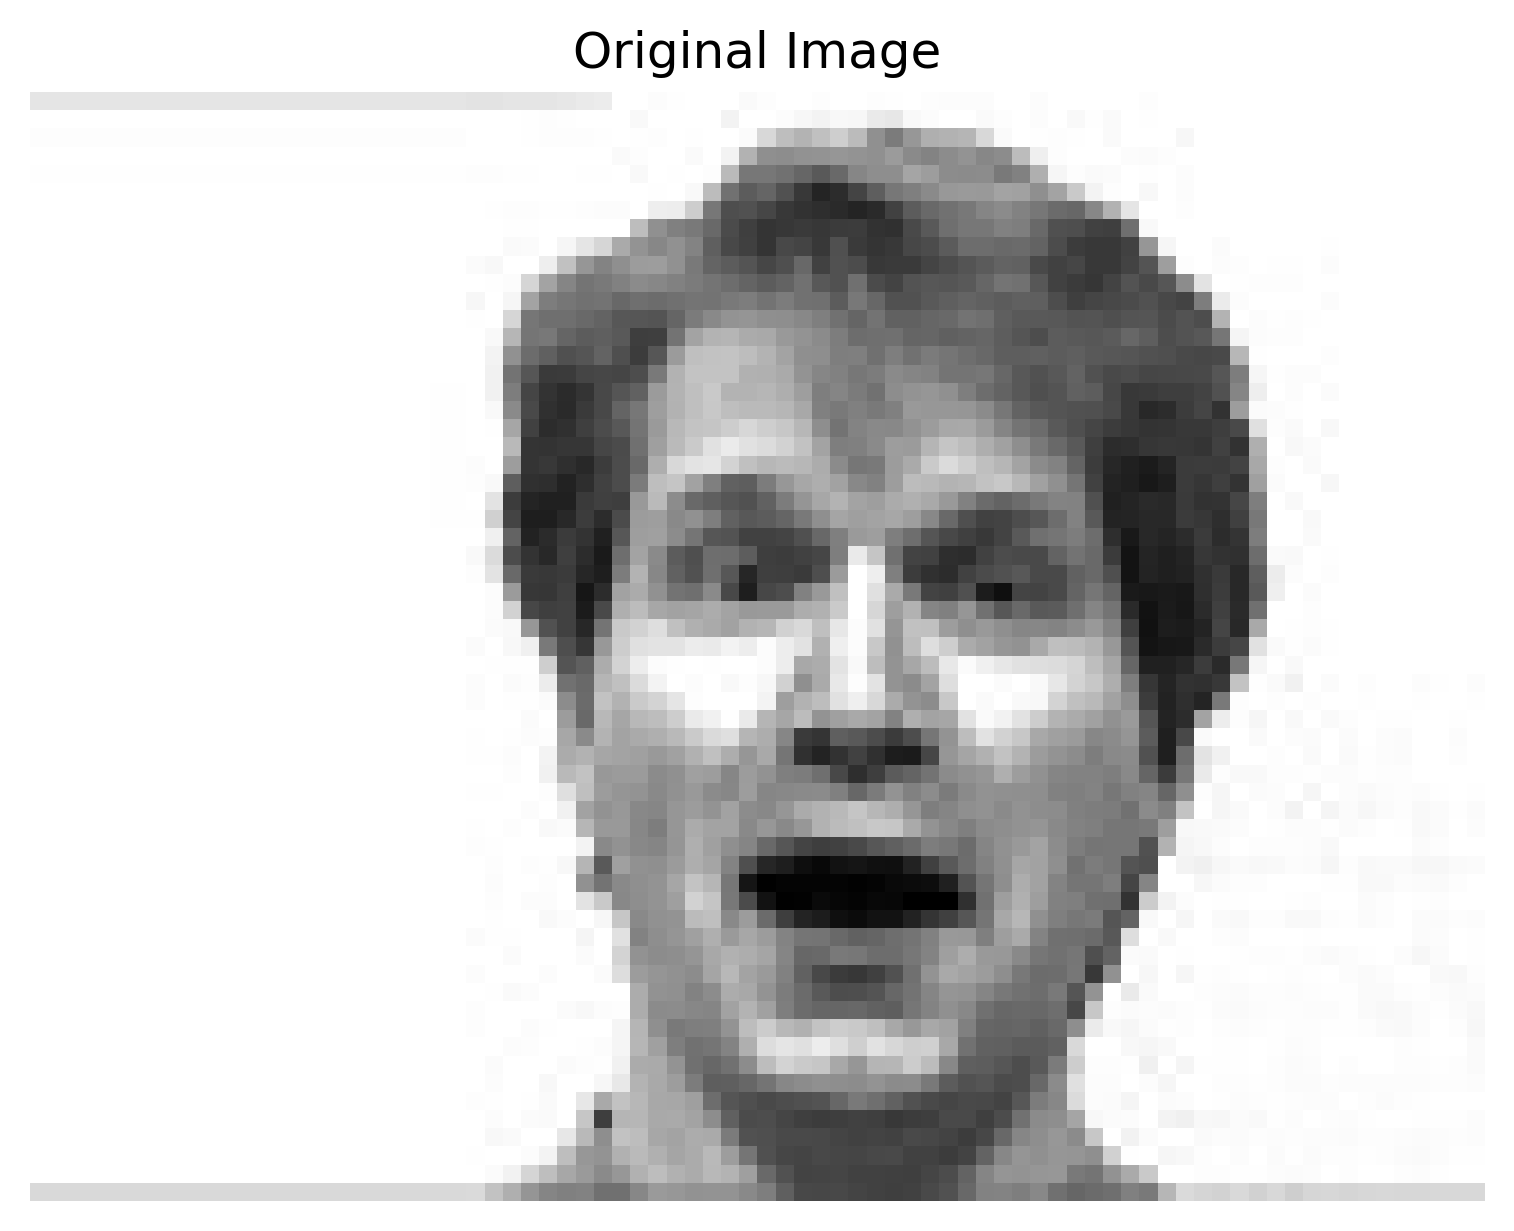

<Figure size 640x480 with 0 Axes>

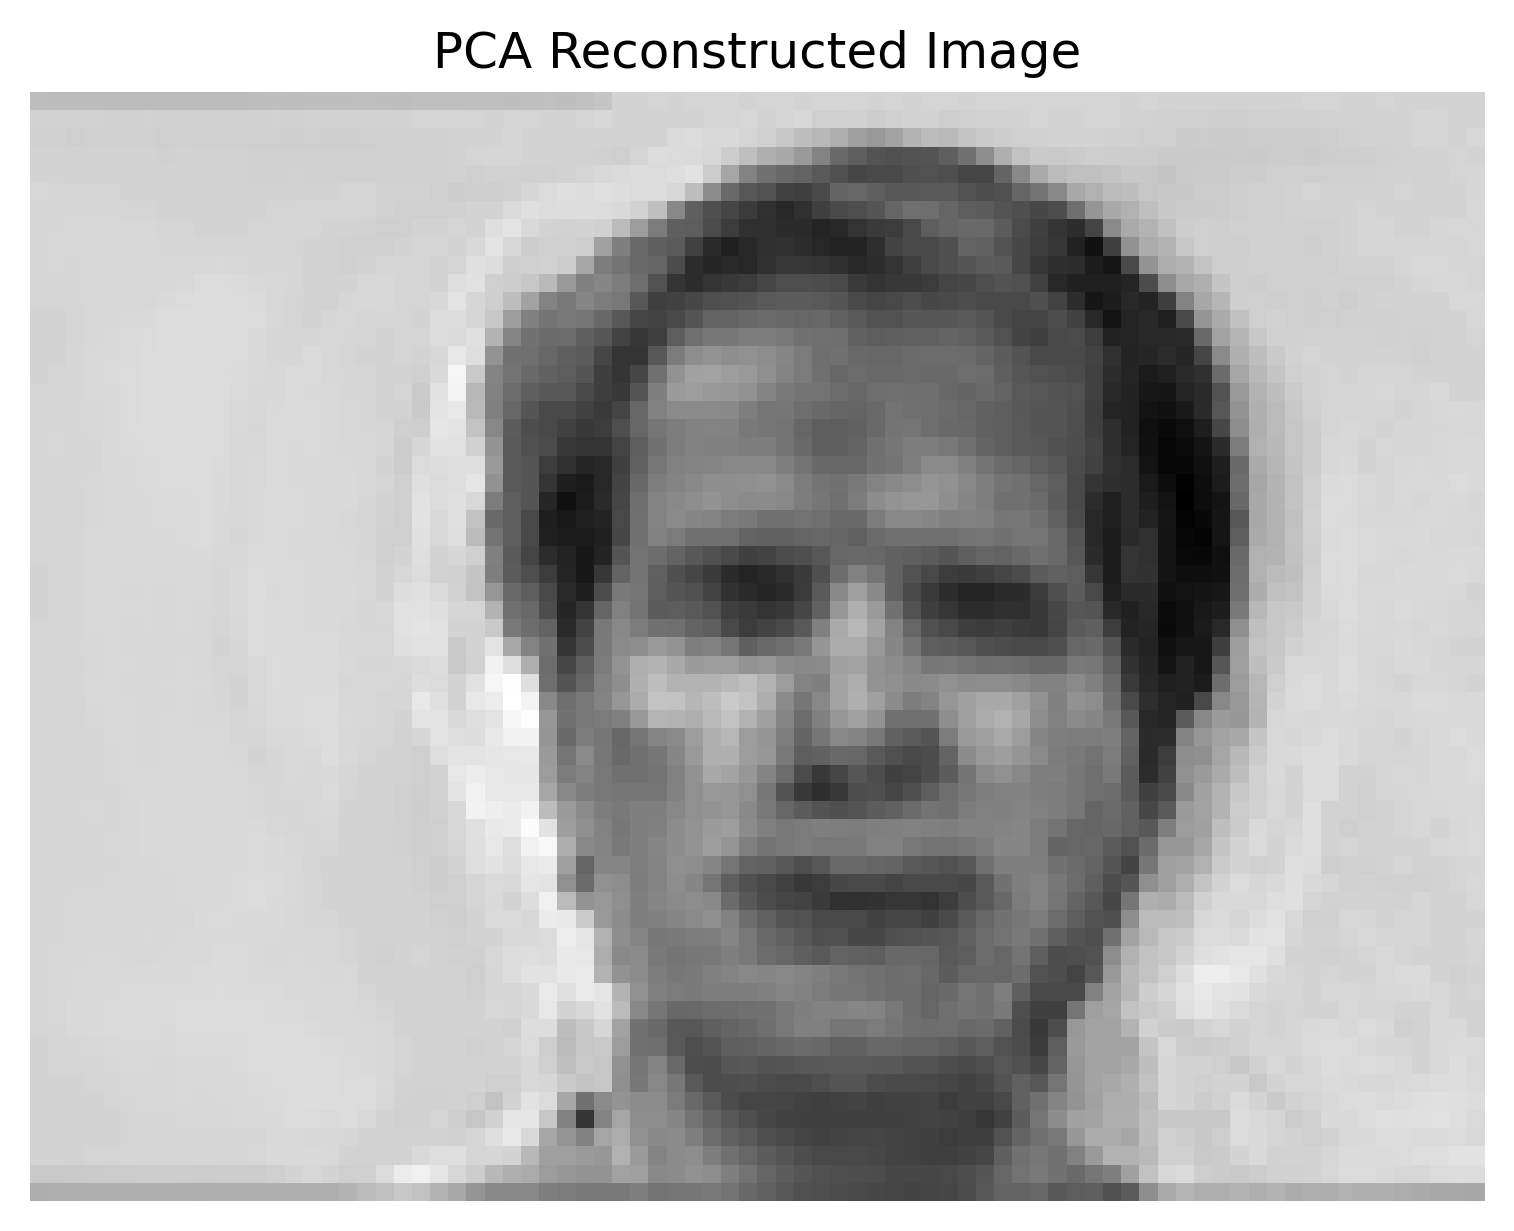

<Figure size 640x480 with 0 Axes>

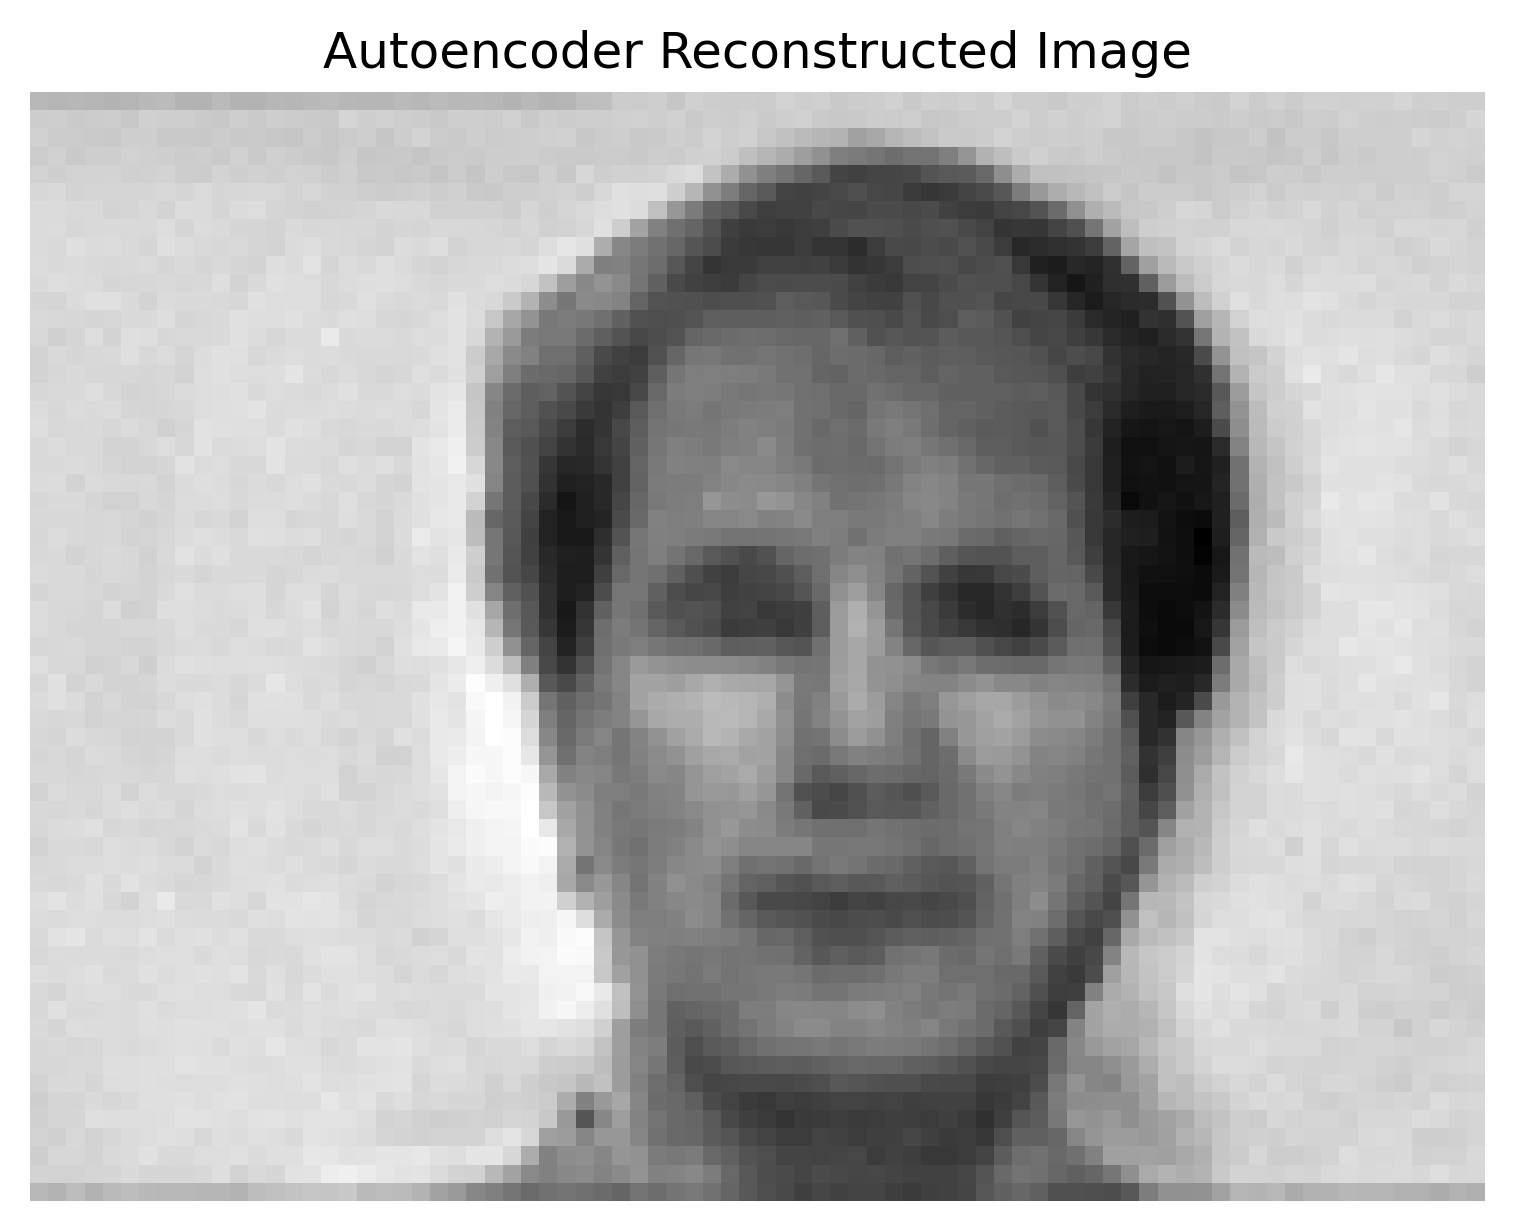

<Figure size 640x480 with 0 Axes>

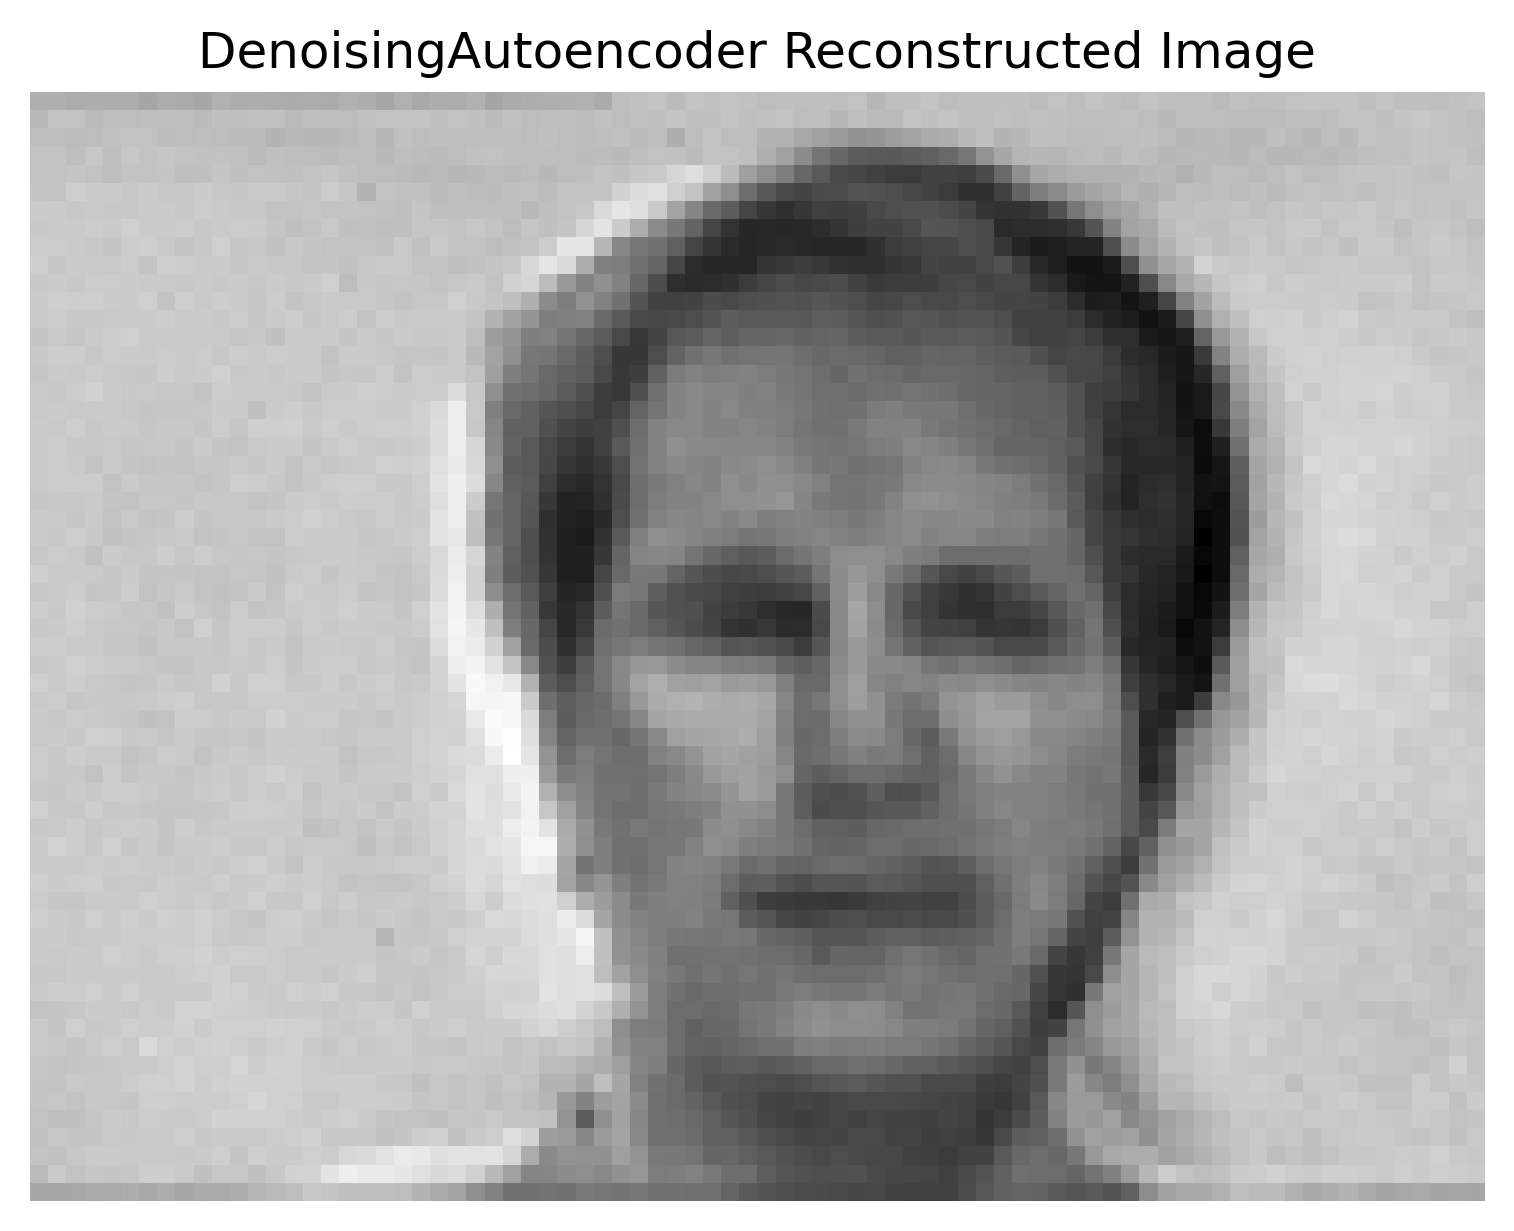

Reconstruction Loss with PCA: 0.010710469688056314
Reconstruction Loss with DenoisingAutoencoder: 0.013547808582822226


<Figure size 640x480 with 0 Axes>

In [11]:
def plot_image(img_vec, title):
    plt.figure(dpi=300)
    plt.imshow(img_vec.reshape(61, 80), cmap='gray')
    plt.title(title)
    plt.axis('off')  # 隐藏坐标轴
    plt.show()
    plt.clf()  # 清除当前图像

def main():
    print("Loading data...")
    X_train, y_train = load_data("train")
    X_val, y_val = load_data("val")
    # Prepare data
    # PCA
    pca = PCA(n_components=40)
    print("PCA Training Start...")
    pca.fit(X_train)

    # Autoencoder
    autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    print("Autoencoder Training Start...")
    autoencoder.fit(X_train, epochs=500, batch_size=135)
    
    # DenoisingAutoencoder
    deno_autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    print("DenoisingAutoencoder Training Start...")
    deno_autoencoder.fit(X_train, epochs=500, batch_size=135)

    # Feature Transform: PCA
    print('Feature Transformation')
    X_train_transformed_pca = pca.transform(X_train)
    X_val_transformed_pca = pca.transform(X_val)

    # Feature Transform: Autoencoder
    X_train_transformed_ae = autoencoder.transform(X_train)
    X_val_transformed_ae = autoencoder.transform(X_val)
    
    # Feature Transform: Autoencoder
    X_train_transformed_deno_ae = deno_autoencoder.transform(X_train)
    X_val_transformed_deno_ae = deno_autoencoder.transform(X_val)

    # Logistic Regression
    # create a logistic regression model
    clf_pca = LogisticRegression(max_iter=10000, random_state=0)
    clf_ae = LogisticRegression(max_iter=10000, random_state=0)
    clf_deno_ae = LogisticRegression(max_iter=10000, random_state=0)

    # fit the model to the data
    print("Logistic Regression Training Start...")
    clf_pca.fit(X_train_transformed_pca, y_train)
    clf_ae.fit(X_train_transformed_ae, y_train)
    clf_deno_ae.fit(X_train_transformed_deno_ae, y_train)

    # make predictions on new data
    y_pred_pca = clf_pca.predict(X_val_transformed_pca)
    y_pred_ae = clf_ae.predict(X_val_transformed_ae)
    y_pred_deno_ae = clf_deno_ae.predict(X_val_transformed_deno_ae)

    print(f"Acc from PCA: {compute_acc(y_pred_pca, y_val)}")
    print(f"Acc from Autoencoder: {compute_acc(y_pred_ae, y_val)}")
    print(f"Acc from DenoisingAutoencoder: {compute_acc(y_pred_deno_ae, y_val)}")

    # ======================================== Reconstruct Image: subject05_17.png ========================================
    img_vec = read_image()
    plot_image(img_vec, 'Original Image')
    img_reconstruct_pca = pca.reconstruct(img_vec)
    plot_image(img_reconstruct_pca, 'PCA Reconstructed Image')
    img_reconstruct_ae = autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))
    plot_image(img_reconstruct_ae, 'Autoencoder Reconstructed Image')
    img_reconstruct_deno_ae = deno_autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))
    plot_image(img_reconstruct_deno_ae, 'DenoisingAutoencoder Reconstructed Image')
    # ========================================

    reconstruction_loss_pca = reconstruction_loss(img_vec, img_reconstruct_pca)
    # reconstruction_loss_ae = reconstruction_loss(img_vec, img_reconstruct_ae)
    reconstruction_loss_deno_ae = reconstruction_loss(img_vec, img_reconstruct_deno_ae)

    print(f"Reconstruction Loss with PCA: {reconstruction_loss_pca}")
    # print(f"Reconstruction Loss with Autoencoder: {reconstruction_loss_ae}")
    print(f"Reconstruction Loss with DenoisingAutoencoder: {reconstruction_loss_deno_ae}")

if __name__ == "__main__":
    main()

In [12]:
import os
import numpy as np
import torch
from PIL import Image
from src.pca import PCA
from src.autoencoder import Autoencoder, DenoisingAutoencoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#TODO: change to your data path
DATA_PATH = './data'
# set random seed
np.random.seed(0)
"""
Tips for debugging:
- Use `print` to check the shape of your data. Shape mismatch is a common error.
- Use `ipdb` to debug your code
    - `ipdb.set_trace()` to set breakpoints and check the values of your variables in interactive mode
    - `python -m ipdb -c continue hw3.py` to run the entire script in debug mode. Once the script is paused, you can use `n` to step through the code line by line.
"""

def read_image():
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    file_path = './data/subject_05_17.png'  #TODO: change to your path
    img = Image.open(file_path).convert("L")
    img_array = np.array(img)
    img_vector = img_array.flatten()
    img_vector = img_vector/255.0
    return np.array(img_vector, dtype='float')


def load_data(split: str) -> tuple[np.ndarray, np.ndarray]:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    data_path = DATA_PATH+'/'+split
    files = os.listdir(data_path)
    image_vectors = []
    label_vectors = []

    for f in files:
        # Read the image using PIL
        img = Image.open(data_path + '/'+f).convert("L")
        f_name, f_type = os.path.splitext(f)
        label = int(f_name[-2:])-1
        label_vectors.append(label)

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Reshape the image into a vector
        img_vector = img_array.flatten()
        img_vector = img_vector/255.0
        image_vectors.append(img_vector)

    return np.array(image_vectors), np.array(label_vectors)


def compute_acc(y_pred: np.ndarray, y_val: np.ndarray):
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return np.sum(y_pred == y_val) / len(y_val)



def reconstruction_loss(img_vec: np.ndarray, img_vec_reconstructed: np.ndarray) -> float:
    """
    DO NOT MODIFY THIS FUNCTION.
    """
    return ((img_vec - img_vec_reconstructed)**2).mean()

def main():
    print("Loading data...")
    X_train, y_train = load_data("train")
    X_val, y_val = load_data("val")
    # Prepare data
    # PCA
    pca = PCA(n_components=40)
    print("PCA Training Start...")
    pca.fit(X_train)

    # # Autoencoder
    # autoencoder = Autoencoder(input_dim=4880, encoding_dim=488)
    # print("Autoencoder Training Start...")
    # autoencoder.fit(X_train, epochs=500, batch_size=135)
    #
    # # DenoisingAutoencoder
    deno_autoencoder = DenoisingAutoencoder(input_dim=4880, encoding_dim=488)
    print("DenoisingAutoencoder Training Start...")
    deno_autoencoder.fit(X_train, epochs=500, batch_size=135)

    # Feature Transform: PCA
    print('Feature Transformation')
    X_train_transformed_pca = pca.transform(X_train)
    X_val_transformed_pca = pca.transform(X_val)

    # # Feature Transform: Autoencoder
    # X_train_transformed_ae = autoencoder.transform(X_train)
    # X_val_transformed_ae = autoencoder.transform(X_val)
    #
    # # Feature Transform: Autoencoder
    X_train_transformed_deno_ae = deno_autoencoder.transform(X_train)
    X_val_transformed_deno_ae = deno_autoencoder.transform(X_val)

    # Logistic Regression
    # create a logistic regression model
    clf_pca = LogisticRegression(max_iter=10000, random_state=0)
    # clf_ae = LogisticRegression(max_iter=10000, random_state=0)
    clf_deno_ae = LogisticRegression(max_iter=10000, random_state=0)

    # fit the model to the data
    print("Logistic Regression Training Start...")
    clf_pca.fit(X_train_transformed_pca, y_train)
    # clf_ae.fit(X_train_transformed_ae, y_train)
    clf_deno_ae.fit(X_train_transformed_deno_ae, y_train)

    # make predictions on new data
    y_pred_pca = clf_pca.predict(X_val_transformed_pca)
    # y_pred_ae = clf_ae.predict(X_val_transformed_ae)
    y_pred_deno_ae = clf_deno_ae.predict(X_val_transformed_deno_ae)

    print(f"Acc from PCA: {compute_acc(y_pred_pca, y_val)}")
    # print(f"Acc from Autoencoder: {compute_acc(y_pred_ae, y_val)}")
    print(f"Acc from DenoisingAutoencoder: {compute_acc(y_pred_deno_ae, y_val)}")

    # Reconstruct Image: subject05_17.png
    img_vec = read_image()
    img_reconstruct_pca = pca.reconstruct(img_vec)
    # img_reconstruct_ae = autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))
    img_reconstruct_deno_ae = deno_autoencoder.reconstruct(torch.tensor(img_vec, dtype=torch.float32))

    reconstruction_loss_pca = reconstruction_loss(img_vec, img_reconstruct_pca)
    # reconstruction_loss_ae = reconstruction_loss(img_vec, img_reconstruct_ae)
    reconstruction_loss_deno_ae = reconstruction_loss(img_vec, img_reconstruct_deno_ae)

    print(f"Reconstruction Loss with PCA: {reconstruction_loss_pca}")
    # print(f"Reconstruction Loss with Autoencoder: {reconstruction_loss_ae}")
    print(f"Reconstruction Loss with DenoisingAutoencoder: {reconstruction_loss_deno_ae}")

if __name__ == "__main__":
    main()


Loading data...
PCA Training Start...
DenoisingAutoencoder Training Start...


100%|██████████| 500/500 [00:10<00:00, 46.09it/s]


Feature Transformation
Logistic Regression Training Start...
Acc from PCA: 0.9333333333333333
Acc from DenoisingAutoencoder: 0.9
Reconstruction Loss with PCA: 0.010710469688056314
Reconstruction Loss with DenoisingAutoencoder: 0.013840788809231598
